In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Load athe image and plot it. The goal is to do a color palette-swap while also improving the detail or SNR of the full image after channel recombination

Text(0.5, 1.0, 'original image')

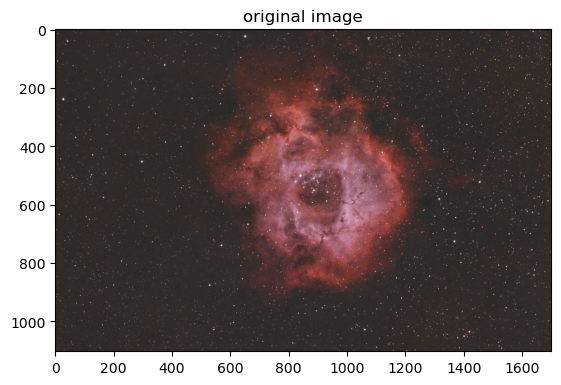

In [2]:
# load image
img = cv.imread('testImg.PNG') 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # this is necessay as opencv uses GBR rather than RGB--have to swap the channels otherwise matplotlib doesn't plot correctly
plt.imshow(img)
plt.title('original image')

Text(0.5, 1.0, 'blue channel')

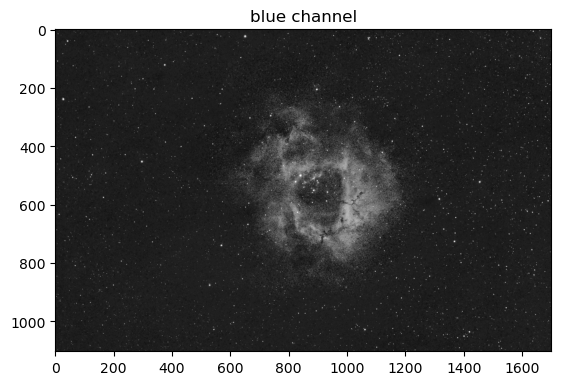

In [3]:
# decompose into RGB channel
r,g,b = cv.split(img)
plt.imshow(b,cmap='gray')
plt.title('blue channel')

Text(0.5, 1.0, 'green channel')

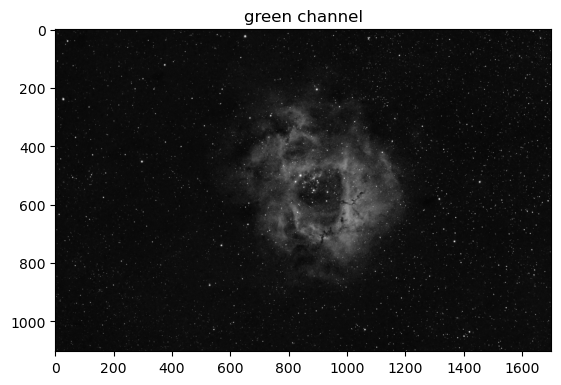

In [4]:
plt.imshow(g,cmap='gray')
plt.title('green channel')

Text(0.5, 1.0, 'red channel')

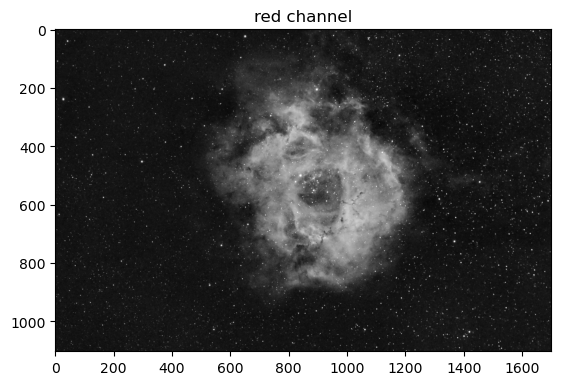

In [5]:
plt.imshow(r, cmap='gray')
plt.title('red channel')

You'll know if its correct if the green and red channels have the most detail. This is because most DSOs are mostly red-so theres a lot of SNR there and also because DSLR cameras have 2x more green pixels than red or blue.

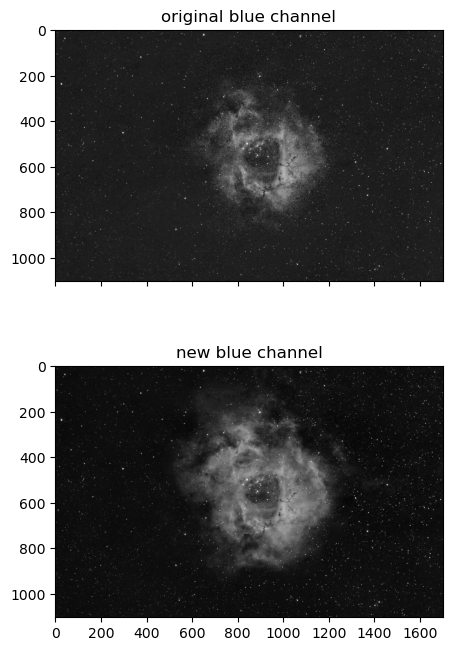

In [6]:
## now lets do image recombination
# now lets throw away the blue channel and recreate it via a combination of red and green
# This is the typical way to achieve "hubble like" colors i.e. blue and gold from a one-shot color camera 
blue = ((0.6*r)+(0.4*g)).astype(np.uint8)

# now lets plot and compare the increase in SNR-again we dont care about color
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(5, 8))
axs[0].set_title('original blue channel')
axs[0].imshow(b, cmap='gray')

axs[1].set_title('new blue channel')
axs[1].imshow(blue, cmap='gray')

Notice how now by replacing your blue channel with a new one composed of green and blue you now have a much higher SNR channel

Text(0.5, 1.0, 'New image (hubble-palette)')

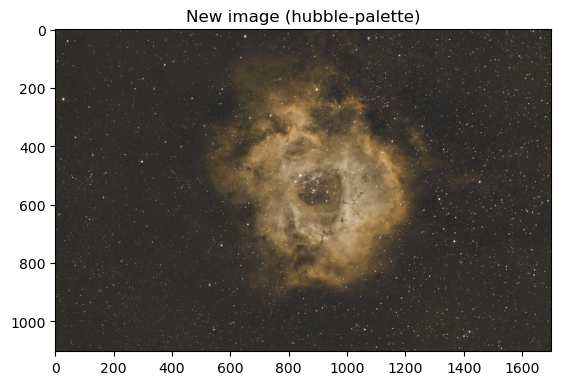

In [7]:
# now lets recombine all the channels and see
hubble = cv.merge([r,blue,g]) # swap the blue and green channels are blue re-combination
plt.imshow(hubble)
plt.title('New image (hubble-palette)')

Now you can accentuate the gold and blue in photoshop, or some other software, using masks and curve adjsutments to end up with something like this:

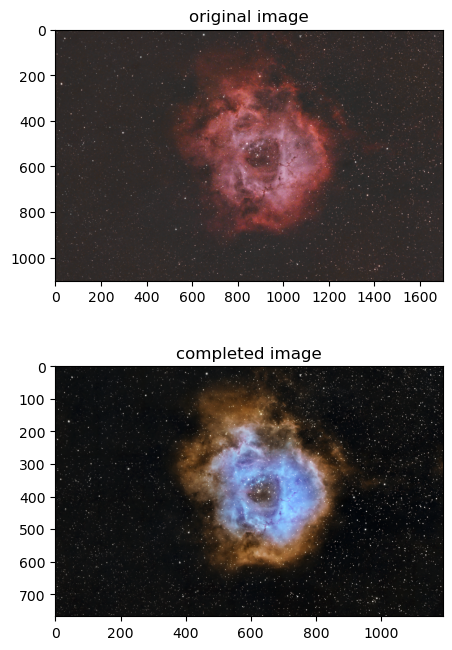

In [10]:
fin = cv.imread('completed.PNG') 
fin = cv.cvtColor(fin, cv.COLOR_BGR2RGB) # this is necessay as opencv uses GBR rather than RGB--have to swap the channels otherwise matplotlib doesn't plot correctly


fig, axs = plt.subplots(nrows=2, figsize=(5, 8))
axs[0].set_title('original image')
axs[0].imshow(img)

axs[1].set_title('completed image')
axs[1].imshow(fin)

With this you could in theory create any color palette you decide. So feel free to go crazy!